# Assessment Review

The topics covered will be:

1. SQL
2. Bayesian Statistics
3. Normal Distributions
4. Statistical Tests

In [1]:
from src.call import call_on_students

## Part 1: SQL

In [3]:
# Need to import pandas and sqlite3
import pandas as pd
import sqlite3

In [4]:
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')

In [5]:
pd.read_sql(
    """
    SELECT *
    FROM Customer
    LIMIT 3
    """, conn
)

CustomerId FirstName   LastName  \
0           1      Luís  Gonçalves   
1           2    Leonie     Köhler   
2           3  François   Tremblay   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   

                           Address                 City State  Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP   Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None  Germany   
2                1498 rue Bélanger             Montréal    QC   Canada   

  PostalCode               Phone                 Fax                  Email  \
0  12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   luisg@embraer.com.br   
1      70174    +49 0711 2842222                None  leonekohler@surfeu.de   
2    H2G 1A7   +1 (514) 721-4711                None    ftremblay@gmail.com   

   SupportRepId  
0             3  
1             5  
2             3

In [6]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
)

InvoiceId  CustomerId          InvoiceDate           BillingAddress  \
0          1           2  2009-01-01 00:00:00  Theodor-Heuss-Straße 34   
1          2           4  2009-01-02 00:00:00         Ullevålsveien 14   
2          3           8  2009-01-03 00:00:00          Grétrystraat 63   

  BillingCity BillingState BillingCountry BillingPostalCode  Total  
0   Stuttgart         None        Germany             70174   1.98  
1        Oslo         None         Norway              0171   3.96  
2    Brussels         None        Belgium              1000   5.94

### Task 1: Write a query to return the customer IDs for every customer in Germany.

In [7]:
call_on_students(1)

['Yasitha']


In [9]:
query = """
SELECT
    CustomerID
FROM
    Customer
WHERE
    Country = 'Germany'

"""

In [10]:
pd.read_sql(query, conn)

CustomerId
0           2
1          36
2          37
3          38

### Task 2: Write a query to return the last names, email addresses and *billing* addresses of the customers who live in Canada.

In [12]:
call_on_students(1)

['Gavin']


In [20]:
query = """

SELECT
    DISTINCT(c.LastName),
    c.Email,
    i.BillingAddress
FROM
    Customer as c
    JOIN Invoice as i on i.CustomerId = c.CustomerId
WHERE
    c.Country = 'Canada'

"""

In [21]:
pd.read_sql(query,conn)

LastName                   Email          BillingAddress
0   Philips      mphilips12@shaw.ca          8210 111 ST NW
1      Silk    marthasilk@gmail.com   194A Chain Lake Drive
2  Sullivan  ellie.sullivan@shaw.ca          5112 48 Street
3  Peterson     jenniferp@rogers.ca     700 W Pender Street
4     Brown        robbrown@shaw.ca  796 Dundas Street West
5   Francis     edfrancis@yachoo.ca        230 Elgin Street
6  Mitchell  aaronmitchell@yahoo.ca      696 Osborne Street
7  Tremblay     ftremblay@gmail.com       1498 rue Bélanger

### Task 3: Write a query to return the billing totals by country, in descending order of the totals.

In [22]:
call_on_students(1)

['Rachel']


In [29]:
query = """

SELECT
    BillingCountry,
    SUM(Total) as Total
FROM
    Invoice
GROUP BY
    BillingCountry
ORDER BY
    Total DESC
"""

In [30]:
pd.read_sql(query, conn)

BillingCountry   Total
0              USA  523.06
1           Canada  303.96
2           France  195.10
3           Brazil  190.10
4          Germany  156.48
5   United Kingdom  112.86
6   Czech Republic   90.24
7         Portugal   77.24
8            India   75.26
9            Chile   46.62
10         Ireland   45.62
11         Hungary   45.62
12         Austria   42.62
13         Finland   41.62
14     Netherlands   40.62
15          Norway   39.62
16          Sweden   38.62
17          Poland   37.62
18           Italy   37.62
19         Denmark   37.62
20       Australia   37.62
21       Argentina   37.62
22           Spain   37.62
23         Belgium   37.62

### ***Task 4: Write a query to return the last names, email addresses, billing addresses, and most recent invoice dates for the customers whose most recent invoice is after Dec 31, 2011.

In [31]:
call_on_students(1)

['Mason']


In [46]:
pd.read_sql(
    """
WITH t AS
(
SELECT 
    CustomerId, BillingAddress, MAX(InvoiceDate) as latestInvoice
FROM 
    Invoice
WHERE 
    InvoiceDate > "2011-12-31"
GROUP BY 
    CustomerId
)



SELECT 
    LastName, Email, latestInvoice
FROM 
    Customer, t
GROUP BY 
    Customer.CustomerId
ORDER BY
    Customer.LastName
    """, conn
)

LastName                          Email        latestInvoice
0        Almeida  roberto.almeida@riotur.gov.br  2013-08-07 00:00:00
1        Barnett            jubarnett@gmail.com  2013-08-07 00:00:00
2        Bernard       camille.bernard@yahoo.fr  2013-08-07 00:00:00
3         Brooks              michelleb@aol.com  2013-08-07 00:00:00
4          Brown               robbrown@shaw.ca  2013-08-07 00:00:00
5          Chase            kachase@hotmail.com  2013-08-07 00:00:00
6     Cunningham       ricunningham@hotmail.com  2013-08-07 00:00:00
7         Dubois        marc.dubois@hotmail.com  2013-08-07 00:00:00
8      Fernandes            jfernandes@yahoo.pt  2013-08-07 00:00:00
9        Francis            edfrancis@yachoo.ca  2013-08-07 00:00:00
10        Girard          wyatt.girard@yahoo.fr  2013-08-07 00:00:00
11     Gonçalves           luisg@embraer.com.br  2013-08-07 00:00:00
12        Gordon         johngordon22@yahoo.com  2013-08-07 00:00:00
13         Goyer               tgoyer@apple.com  2013-08-07 00:00:00
14          Gray           patrick.gray@aol.com  2013-08-07 00:00:00
15        Gruber         astrid.gruber@apple.at  2013-08-07 00:00:00
16     Gutiérrez       diego.gutierrez@yahoo.ar  2013-08-07 00:00:00
17        Hansen          bjorn.hansen@yahoo.no  2013-08-07 00:00:00
18        Harris             fharris@google.com  2013-08-07 00:00:00
19          Holý                hholy@gmail.com  2013-08-07 00:00:00
20        Hughes          phil.hughes@gmail.com  2013-08-07 00:00:00
21    Hämäläinen      terhi.hamalainen@apple.fi  2013-08-07 00:00:00
22     Johansson      joakim.johansson@yahoo.se  2013-08-07 00:00:00
23         Jones         emma_jones@hotmail.com  2013-08-07 00:00:00
24        Kovács       ladislav_kovacs@apple.hu  2013-08-07 00:00:00
25        Köhler          leonekohler@surfeu.de  2013-08-07 00:00:00
26       Leacock             hleacock@gmail.com  2013-08-07 00:00:00
27      Lefebvre    dominiquelefebvre@gmail.com  2013-08-07 00:00:00
28       Mancini         lucas.mancini@yahoo.it  2013-08-07 00:00:00
29       Martins       eduardo@woodstock.com.br  2013-08-07 00:00:00
30       Mercier      isabelle_mercier@apple.fr  2013-08-07 00:00:00
31        Miller            dmiller@comcast.com  2013-08-07 00:00:00
32      Mitchell         aaronmitchell@yahoo.ca  2013-08-07 00:00:00
33        Murray          steve.murray@yahoo.uk  2013-08-07 00:00:00
34         Muñoz         enrique_munoz@yahoo.es  2013-08-07 00:00:00
35       Nielsen          kara.nielsen@jubii.dk  2013-08-07 00:00:00
36      O'Reilly           hughoreilly@apple.ie  2013-08-07 00:00:00
37        Pareek        manoj.pareek@rediff.com  2013-08-07 00:00:00
38       Peeters          daan_peeters@apple.be  2013-08-07 00:00:00
39      Peterson            jenniferp@rogers.ca  2013-08-07 00:00:00
40       Philips             mphilips12@shaw.ca  2013-08-07 00:00:00
41       Ralston             fralston@gmail.com  2013-08-07 00:00:00
42         Ramos       fernadaramos4@uol.com.br  2013-08-07 00:00:00
43         Rocha               alero@uol.com.br  2013-08-07 00:00:00
44         Rojas             luisrojas@yahoo.cl  2013-08-07 00:00:00
45       Sampaio              masampaio@sapo.pt  2013-08-07 00:00:00
46     Schneider      hannah.schneider@yahoo.de  2013-08-07 00:00:00
47      Schröder            nschroder@surfeu.de  2013-08-07 00:00:00
48          Silk           marthasilk@gmail.com  2013-08-07 00:00:00
49         Smith        jacksmith@microsoft.com  2013-08-07 00:00:00
50    Srivastava       puja_srivastava@yahoo.in  2013-08-07 00:00:00
51       Stevens             vstevens@yahoo.com  2013-08-07 00:00:00
52      Sullivan         ellie.sullivan@shaw.ca  2013-08-07 00:00:00
53        Taylor           mark.taylor@yahoo.au  2013-08-07 00:00:00
54      Tremblay            ftremblay@gmail.com  2013-08-07 00:00:00
55  Van der Berg        johavanderberg@yahoo.nl  2013-08-07 00:00:00
56   Wichterlová       frantisekw@jetbrains.com  2013-08-07 00:00:00
57    

In [47]:
pd.read_sql("""
SELECT
    c.LastName,
    c.Email,
    i.BillingAddress,
    MAX(i.InvoiceDate) as Most_Recent
FROM Customer c
JOIN Invoice i on i.CustomerID=c.CustomerId
WHERE InvoiceDate > "2011-12-31 00:00:00"
GROUP BY c.CustomerId
ORDER BY c.LastName

;""", conn)

LastName                          Email  \
0        Almeida  roberto.almeida@riotur.gov.br   
1        Barnett            jubarnett@gmail.com   
2        Bernard       camille.bernard@yahoo.fr   
3         Brooks              michelleb@aol.com   
4          Brown               robbrown@shaw.ca   
5          Chase            kachase@hotmail.com   
6     Cunningham       ricunningham@hotmail.com   
7         Dubois        marc.dubois@hotmail.com   
8      Fernandes            jfernandes@yahoo.pt   
9        Francis            edfrancis@yachoo.ca   
10        Girard          wyatt.girard@yahoo.fr   
11     Gonçalves           luisg@embraer.com.br   
12        Gordon         johngordon22@yahoo.com   
13         Goyer               tgoyer@apple.com   
14          Gray           patrick.gray@aol.com   
15        Gruber         astrid.gruber@apple.at   
16     Gutiérrez       diego.gutierrez@yahoo.ar   
17        Hansen          bjorn.hansen@yahoo.no   
18        Harris             fharris@google.com   
19          Holý                hholy@gmail.com   
20        Hughes          phil.hughes@gmail.com   
21    Hämäläinen      terhi.hamalainen@apple.fi   
22     Johansson      joakim.johansson@yahoo.se   
23         Jones         emma_jones@hotmail.com   
24        Kovács       ladislav_kovacs@apple.hu   
25        Köhler          leonekohler@surfeu.de   
26       Leacock             hleacock@gmail.com   
27      Lefebvre    dominiquelefebvre@gmail.com   
28       Mancini         lucas.mancini@yahoo.it   
29       Martins       eduardo@woodstock.com.br   
30       Mercier      isabelle_mercier@apple.fr   
31        Miller            dmiller@comcast.com   
32      Mitchell         aaronmitchell@yahoo.ca   
33        Murray          steve.murray@yahoo.uk   
34         Muñoz         enrique_munoz@yahoo.es   
35       Nielsen          kara.nielsen@jubii.dk   
36      O'Reilly           hughoreilly@apple.ie   
37        Pareek        manoj.pareek@rediff.com   
38       Peeters          daan_peeters@apple.be   
39      Peterson            jenniferp@rogers.ca   
40       Philips             mphilips12@shaw.ca   
41       Ralston             fralston@gmail.com   
42         Ramos       fernadaramos4@uol.com.br   
43         Rocha               alero@uol.com.br   
44         Rojas             luisrojas@yahoo.cl   
45       Sampaio              masampaio@sapo.pt   
46     Schneider      hannah.schneider@yahoo.de   
47      Schröder            nschroder@surfeu.de   
48          Silk           marthasilk@gmail.com   
49         Smith        jacksmith@microsoft.com   
50    Srivastava       puja_srivastava@yahoo.in   
51       Stevens             vstevens@yahoo.com   
52      Sullivan         ellie.sullivan@shaw.ca   
53        Taylor           mark.taylor@yahoo.au   
54      Tremblay            ftremblay@gmail.com   
55  Van der Berg        johavanderberg@yahoo.nl   
56   Wichterlová       frantisekw@jetbrains.com   
57        Wójcik         stanisław.wójcik@wp.pl   
58    Zimmermann           fzimmermann@yahoo.de   

                              BillingAddress          Most_Recent  
0                           Praça Pio X, 119  2013-10-05 00:00:00  
1                                302 S 700 E  2013-05-19 00:00:00  
2                              4, Rue Milton  2013-09-07 00:00:00  
3                               627 Broadway  2013-10-08 00:00:00  
4                     796 Dundas Street West  2013-12-06 00:00:00  
5                           801 W 4th Street  2013-12-04 00:00:00  
6                        2211 W Berry Street  2013-04-05 00:00:00  
7                        11, Place Bellecour  2013-10-21 00:00:00  
8                         Rua da Assunção 53  2012-10-01 00:00:00  
9                           230 Elgin Street  2013-01-02 00:00:00  
10                    9, Place Louis Barthou  2013-11-03 00:00:00  
11           Av. Brigadeiro Faria Lima, 2170  2013-08-07 00:00:00  
12                           69 Salem Street  2013-12-04 00:00:

## Part 2: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 5: Calculate the probability

In [50]:
call_on_students(1)

['David']


**1. Which probability are we trying to find?**

   - P(Democrat|No)
   

**2. Based on that, what other pieces do we need?**

       (P(No|Democrat) * P(Democrat)) / P(No)
    

In [54]:
# **3. Result?**

ans = ((.75) * (.6)) / ((.75 *.6) + (.05 * .4))
   
ans

0.9574468085106382

## Part 3: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 6: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [55]:
call_on_students(1)

['KC']


In [56]:
# Code here
z_eight = (8 - 6 ) / 2

In [57]:
z_eight

1.0

### Task 7: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [58]:
call_on_students(1)

['Deniz']


In [59]:
from scipy import stats

In [60]:
# Code here CDF

over_eight = 1 - stats.norm(loc=6, scale=2).cdf(8)


over_eight

0.15865525393145707

In [66]:
# SF

over_eight =stats.norm(loc=6, scale=2).sf(8)

In [65]:
over_eight

0.15865525393145707

### Task 8: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [80]:
call_on_students(1)

['Tristan']


In [77]:
# Code here

std_err = .5 / (np.sqrt(7))

# std_err = stats.sem(5)

ci = stats.t.interval(alpha=.95, loc=5, scale=std_err, df=6)
ci

(4.53757712628571, 5.46242287371429)

### Task 9: Interpret the 95% Confidence Interval that you derived in the above question

In [79]:
call_on_students(1)

['Nick']


Interpret: 

- There is a 95% chance that the actual population mean is between lower and upper


## Part 4: Statistical Testing

Let's make some hypotheses about cars!

### Task 10: Set Up

In [81]:
call_on_students(1)

['Irwin']


In [82]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('./data/auto-mpg.csv')

In [84]:
# Check the head of our data
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [85]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [86]:
# Describe the data
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

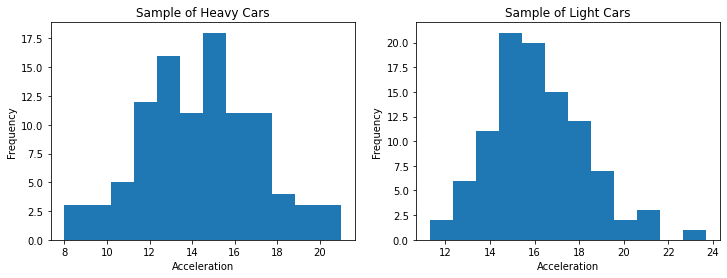

In [87]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 11: Set up the null and alternative hypotheses for this test

In [88]:
call_on_students(1)

['Andrew']


**Null hypothesis:**

- Light cars do not accelerate faster or are equal to than heavy cars


**Alternative hypothesis:**

- Light cars accelerate faster than heavy


### Task 12: Describe your Type 1 and Type 2 errors in this context

In [89]:
call_on_students(1)

['David']


**Type I Error:**

- reject the Null when we should have failed to reject
- light cars accelerate faster then in fact the are the same or lower


**Type II Error:**

- failing to reject Null when we should have
- light cars do not, when in fact they do



### Task 13: The Hypothesis Test!

### 13a: Describe the type of test:

In [90]:
call_on_students(1)

['Reyn']


Description:

- independent two sample t-test
- one-tailed, right side


### 13b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [91]:
call_on_students(1)

['Deniz']


In [95]:
np.array(heavy_cars.acceleration).var()

7.203299

In [96]:
np.array(light_cars.acceleration).var()

4.9233839999999995

In [101]:
# Code here
# t-stats(the values from light and heavy cars, equal="False",   )

tstat, p = stats.ttest_ind(heavy_cars.acceleration, light_cars.acceleration)



In [103]:
tstat, p/2

(-5.00874014469676, 6.048220334084493e-07)

In [97]:
stats.ttest_ind(heavy_cars.acceleration, light_cars.acceleration, equal_var=False)

Ttest_indResult(statistic=-5.00874014469676, pvalue=1.2412905689208302e-06)

### 13c: Analyze your results: can you reject the null hypothesis?

In [100]:
call_on_students(1)

['Rachel']


Can you reject the null hypothesis?

-  if p is low, null must go!
- Yes, reject the null
- We can reject the null, there is evidence that light do accelerate faster
